In [1]:
import os
import requests
import pandas as pd


In [2]:
Tabla=pd.read_csv('200914COVID19MEXICO.csv',encoding='latin')
TablaD=pd.DataFrame(Tabla)

In [3]:
TablaD

#Tabla de todos los datos covid 19 en méxico

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-09-14,063d1d,2,4,9,1,9,9,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-09-14,0ee9be,2,4,9,2,9,9,7,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-09-14,18ae31,2,4,15,1,15,15,58,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-09-14,02d970,2,4,13,2,13,13,76,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-09-14,05a196,2,4,12,2,20,12,29,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520458,2020-09-14,3ebed4,2,12,3,1,3,3,3,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
1520459,2020-09-14,3b3b34,2,12,29,2,29,29,51,2,...,2,2,2,2,2,3,99,MÃ©xico,99,2
1520460,2020-09-14,1bf8c0,2,4,19,1,19,19,12,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
1520461,2020-09-14,0d9bd8,2,9,21,2,21,21,114,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97


#  Preguntas

## 1.- ¿Cúal es la edad promedio de los casos de defunción?

In [4]:


TablaD.columns

#enlistamos las columnas

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [5]:
# Veamos la columna que señala la fecha de los pacientes que fallecieron

TablaD['FECHA_DEF']

0          9999-99-99
1          9999-99-99
2          9999-99-99
3          2020-04-27
4          2020-04-06
              ...    
1520458    9999-99-99
1520459    9999-99-99
1520460    9999-99-99
1520461    9999-99-99
1520462    9999-99-99
Name: FECHA_DEF, Length: 1520463, dtype: object

In [6]:
# Los pacientes con fecha 9999-99-99 son pacientes no fallecidos. FIltremos los pacientes fallecidos. 
DEF=TablaD.loc[TablaD.FECHA_DEF!='9999-99-99',:]

In [7]:
import numpy as np

In [8]:
DEF.isna().sum()

#No hay datos NAN

FECHA_ACTUALIZACION    0
ID_REGISTRO            0
ORIGEN                 0
SECTOR                 0
ENTIDAD_UM             0
SEXO                   0
ENTIDAD_NAC            0
ENTIDAD_RES            0
MUNICIPIO_RES          0
TIPO_PACIENTE          0
FECHA_INGRESO          0
FECHA_SINTOMAS         0
FECHA_DEF              0
INTUBADO               0
NEUMONIA               0
EDAD                   0
NACIONALIDAD           0
EMBARAZO               0
HABLA_LENGUA_INDIG     0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
RESULTADO              0
MIGRANTE               0
PAIS_NACIONALIDAD      0
PAIS_ORIGEN            0
UCI                    0
dtype: int64

In [9]:
DEF['FECHA_DEF'].value_counts()
DEF['FECHA_DEF'].value_counts().sum()

# Contamos los pacientes pallecidos (incluidos los sospechosos)

90754

In [11]:
DEFP=DEF['RESULTADO']==1
DEFP = DEF[DEFP]
DEFP['FECHA_DEF']

#Filtramos los casos confirmados

3          2020-04-27
4          2020-04-06
7          2020-05-27
11         2020-04-27
19         2020-04-12
              ...    
1016563    2020-07-19
1016564    2020-07-26
1016565    2020-07-26
1016579    2020-07-13
1016588    2020-08-15
Name: FECHA_DEF, Length: 71049, dtype: object

In [13]:
DEFP['FECHA_DEF'].value_counts()
DEFP['FECHA_DEF'].value_counts().sum()

# Numero total de defunciones de casos confirmados de covid 


71049

In [14]:
# Calculemos la edad promedio de los pacientes fallecidos

DEFP['EDAD'].mean()

62.24269166349984

### La edad pormedio de pacientes fallecidos es de 62 años 

## 2.- ¿Que edad promedio de muerte por cada sexo? 

In [15]:
# Filtremos los datos por sexo y calculemos su edad promedio separadamente, considerando solamente los datos en DF (correspondiente a los pacientes fallecidos). 
DEFP

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
3,2020-09-14,02d970,2,4,13,2,13,13,76,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-09-14,05a196,2,4,12,2,20,12,29,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
7,2020-09-14,1622ec,2,4,15,1,15,15,109,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
11,2020-09-14,05171a,2,4,9,2,9,9,7,2,...,1,2,2,1,99,1,99,MÃ©xico,99,2
19,2020-09-14,10d9be,2,4,2,2,10,2,4,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016563,2020-09-14,006fff,1,12,26,1,26,26,17,2,...,1,1,2,2,1,1,99,MÃ©xico,99,2
1016564,2020-09-14,0aa749,1,12,11,2,11,11,23,2,...,2,2,2,2,2,1,99,MÃ©xico,99,1
1016565,2020-09-14,07a0ab,2,12,30,1,30,30,92,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2
1016579,2020-09-14,06b0c9,2,4,28,2,28,28,41,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2


In [16]:
in_2 = DEFP['SEXO'] == 2
TablaD_3 = DEFP[in_2]
TablaD_3

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
3,2020-09-14,02d970,2,4,13,2,13,13,76,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-09-14,05a196,2,4,12,2,20,12,29,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
11,2020-09-14,05171a,2,4,9,2,9,9,7,2,...,1,2,2,1,99,1,99,MÃ©xico,99,2
19,2020-09-14,10d9be,2,4,2,2,10,2,4,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
21,2020-09-14,077c96,2,4,9,2,16,9,5,2,...,2,2,2,2,1,1,99,MÃ©xico,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016540,2020-09-14,1abb98,1,12,11,2,11,11,20,2,...,1,2,2,2,2,1,99,MÃ©xico,99,2
1016555,2020-09-14,0152e3,1,12,4,2,4,4,2,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
1016564,2020-09-14,0aa749,1,12,11,2,11,11,23,2,...,2,2,2,2,2,1,99,MÃ©xico,99,1
1016579,2020-09-14,06b0c9,2,4,28,2,28,28,41,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2


In [17]:
# Calculemos la edad promedio de la TablaD_3 que son los datos de los hombres fallecidos por covid 19. 

TablaD_3['EDAD'].mean()

61.68034401260504

### La edad promedio de hombres fallecidos por COV-19 es de 62 años. 

In [18]:
# Filtremos los datos de las mujeres fallecidas 

in_1 = DEFP['SEXO'] == 1
TablaD_4 = DEFP[in_1]
TablaD_4

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
7,2020-09-14,1622ec,2,4,15,1,15,15,109,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
22,2020-09-14,1719d0,2,4,30,1,30,30,193,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
25,2020-09-14,0ff914,2,4,25,1,25,25,6,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
43,2020-09-14,19ec35,2,4,15,1,15,15,45,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
47,2020-09-14,0cf254,2,4,2,1,16,2,4,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016452,2020-09-14,0a9074,2,5,21,1,21,21,207,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
1016517,2020-09-14,18ecb3,2,4,14,1,14,14,39,2,...,2,1,1,2,99,1,99,MÃ©xico,99,2
1016545,2020-09-14,1b55a3,2,4,14,1,14,14,101,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
1016563,2020-09-14,006fff,1,12,26,1,26,26,17,2,...,1,1,2,2,1,1,99,MÃ©xico,99,2


In [19]:
# Calculemos la edad promedio
TablaD_4['EDAD'].mean()

63.25626158640003

### La edad promedio de la mujeres fallecidas por COV 19 es de 63

 ## 3. ¿Qué sexo es el que sufre mayor numero de defunciones?

In [20]:
TablaD_3.shape


(45696, 35)

In [21]:
TablaD_4.shape

(25353, 35)

### El numero de pacientes de pacientes masculinos fallecidos es de 45 696 y el de mujeres es de 25353. FALLECEN MÁS LOS HOMBRES. 

## 4. Numero de recien nacidos fallecidos 

In [22]:

DEFO=DEFP.sort_values('EDAD')['EDAD']
DEFO

#Observamos el maximo y el minimo de edad de pacientes fallecidos. 


905003      0
240927      0
241162      0
880792      0
881082      0
         ... 
56334     101
69641     101
981760    102
674068    102
89347     103
Name: EDAD, Length: 71049, dtype: int64

In [23]:
in_0 = DEFP['EDAD'] == 0
in_0

3          False
4          False
7          False
11         False
19         False
           ...  
1016563    False
1016564    False
1016565    False
1016579    False
1016588    False
Name: EDAD, Length: 71049, dtype: bool

In [24]:
RECIEN = DEFP[in_0]
RECIEN

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
1287,2020-09-14,083c34,1,4,15,2,15,15,31,2,...,2,2,2,2,1,1,99,MÃ©xico,99,1
28987,2020-09-14,1cc0ea,2,12,15,1,15,15,33,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
31662,2020-09-14,014b5d,2,6,2,2,2,2,4,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
37142,2020-09-14,02f8e2,1,12,2,2,2,2,4,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
38166,2020-09-14,1c724e,2,12,15,2,15,15,31,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970349,2020-09-14,1762dd,1,12,12,1,12,12,21,2,...,1,2,2,2,1,1,99,MÃ©xico,99,1
973989,2020-09-14,085cc0,1,4,6,1,6,6,8,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
994193,2020-09-14,1758a7,1,12,29,2,29,29,10,2,...,2,2,2,2,1,1,99,MÃ©xico,99,1
995401,2020-09-14,047102,1,12,12,1,12,12,29,2,...,1,2,2,2,1,1,99,MÃ©xico,99,2


### El numero es de 67 recien nacidos fallecidos. 

# Usando value.counts()

In [25]:

DEFP['TABAQUISMO'].value_counts()

2     64986
1      5647
98      416
Name: TABAQUISMO, dtype: int64

In [26]:
((5647)*100)/71049

# Calculamos el porcentaje de pacientes fallecidos con Tabaquismo

7.948035862573716

In [30]:

DEFP['OBESIDAD'].value_counts()

2     53255
1     17389
98      405
Name: OBESIDAD, dtype: int64

In [31]:
((17389)*100)/71049

# Calculamos el porcentaje de pacientes fallecidos con Obesidad

24.47465833438894

In [32]:
DEFP['CARDIOVASCULAR'].value_counts()

2     66839
1      3788
98      422
Name: CARDIOVASCULAR, dtype: int64

In [34]:
((3788)*100)/71049

# Calculamos el porcentaje de pacientes fallecidos con Cardiovascular

5.331531759771425

In [35]:
DEFP['RENAL_CRONICA'].value_counts()

2     65720
1      4928
98      401
Name: RENAL_CRONICA, dtype: int64

In [37]:
((4298)*100)/71049

# Calculamos el porcentaje de pacientes fallecidos con Renal cornica

6.049346225844136

In [38]:
DEFP['OTRO_CASO'].value_counts()

99    33898
2     27343
1      9808
Name: OTRO_CASO, dtype: int64

In [39]:
((9808)*100)/71049

13.80455741811989

In [40]:
DEFP['NEUMONIA'].value_counts()

1    52773
2    18276
Name: NEUMONIA, dtype: int64

In [42]:
((52773)*100)/71049

# Calculamos el porcentaje de pacientes fallecidos con Neumonia

74.27690748638264

In [43]:
DEFP['ASMA'].value_counts()

2     69232
1      1426
98      391
Name: ASMA, dtype: int64

In [44]:
((1426)*100)/71049

# Calculamos el porcentaje de pacientes fallecidos con Asma

2.007065546313108

In [45]:
DEFP['HIPERTENSION'].value_counts()

2     38942
1     31713
98      394
Name: HIPERTENSION, dtype: int64

In [47]:
((31713)*100)/71049

# Calculamos el porcentaje de pacientes fallecidos con hipertension

44.63539247561542

In [55]:
DEFP['DIABETES'].value_counts()

2     43498
1     27126
98      425
Name: DIABETES, dtype: int64

In [56]:
((27126)*100)/71049

# Calculamos el porcentaje de pacientes fallecidos con Diabetes

38.17928471899675

In [57]:
DEFP['EMBARAZO'].value_counts()

97    45696
2     25218
1        72
98       63
Name: EMBARAZO, dtype: int64

In [58]:
((71)*100)/71049

0.09993103351208321

In [59]:
DEFP['RESULTADO'].value_counts()


1    71049
Name: RESULTADO, dtype: int64

# Casos de hipertension y diabetes

In [60]:
DHO=DEFP[(DEFP['HIPERTENSION']==1)&(DEFP['DIABETES']==1)]
DHO

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
25,2020-09-14,0ff914,2,4,25,1,25,25,6,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
47,2020-09-14,0cf254,2,4,2,1,16,2,4,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
66,2020-09-14,13ae3b,2,4,30,2,30,30,189,2,...,2,1,1,2,99,1,99,MÃ©xico,99,2
105,2020-09-14,1c54ed,2,4,21,2,21,21,114,2,...,2,2,2,2,2,1,99,MÃ©xico,99,1
109,2020-09-14,139ed6,2,4,15,2,15,15,51,1,...,1,2,2,2,2,1,99,MÃ©xico,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016515,2020-09-14,082f93,1,4,5,2,5,5,30,2,...,2,2,1,2,99,1,99,MÃ©xico,99,2
1016517,2020-09-14,18ecb3,2,4,14,1,14,14,39,2,...,2,1,1,2,99,1,99,MÃ©xico,99,2
1016518,2020-09-14,17ab8b,1,4,25,2,25,25,6,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97
1016540,2020-09-14,1abb98,1,12,11,2,11,11,20,2,...,1,2,2,2,2,1,99,MÃ©xico,99,2


In [61]:
DHO['DIABETES'].value_counts()

1    17338
Name: DIABETES, dtype: int64

In [62]:
((17338)*100)/71049

24.402876887781673

# Casos obesidad diabetes

In [63]:
DDO=DEFP[(DEFP['OBESIDAD']==1)&(DEFP['DIABETES']==1)]
DDO

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
25,2020-09-14,0ff914,2,4,25,1,25,25,6,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
47,2020-09-14,0cf254,2,4,2,1,16,2,4,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
66,2020-09-14,13ae3b,2,4,30,2,30,30,189,2,...,2,1,1,2,99,1,99,MÃ©xico,99,2
133,2020-09-14,12943e,2,4,26,1,26,26,42,1,...,1,1,2,2,99,1,99,MÃ©xico,99,97
171,2020-09-14,1ce5c8,2,4,9,2,9,9,17,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016239,2020-09-14,15a6f0,1,12,21,2,9,21,156,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1016386,2020-09-14,02deb7,2,12,11,1,11,11,27,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2
1016409,2020-09-14,089384,2,12,21,1,21,21,164,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1016517,2020-09-14,18ecb3,2,4,14,1,14,14,39,2,...,2,1,1,2,99,1,99,MÃ©xico,99,2


# Casos neumonia tabaquismo

In [64]:
DNT=DEFP[(DEFP['NEUMONIA']==1)&(DEFP['TABAQUISMO']==1)]
DNT

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
11,2020-09-14,05171a,2,4,9,2,9,9,7,2,...,1,2,2,1,99,1,99,MÃ©xico,99,2
274,2020-09-14,133259,2,4,9,2,9,9,5,2,...,2,1,2,1,99,1,99,MÃ©xico,99,2
300,2020-09-14,17faa4,2,4,18,2,14,14,67,2,...,2,2,2,1,99,1,99,MÃ©xico,99,1
609,2020-09-14,10e4b6,2,12,15,2,29,15,39,2,...,2,2,2,1,2,1,99,MÃ©xico,99,2
671,2020-09-14,17891e,2,12,15,2,9,15,81,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016162,2020-09-14,102862,1,4,9,2,9,9,5,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2
1016166,2020-09-14,12ff57,1,12,14,2,14,14,57,2,...,2,1,1,1,2,1,99,MÃ©xico,99,1
1016328,2020-09-14,00bac8,1,4,19,2,28,19,6,1,...,1,1,2,1,99,1,99,MÃ©xico,99,97
1016496,2020-09-14,0fdd3c,1,4,24,2,24,24,28,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2


In [65]:
((4334)*100)/71049

6.100015482272798

# Casos OBESIDAD cardiovascular


In [66]:
DOC=DEFP[(DEFP['OBESIDAD']==1)&(DEFP['CARDIOVASCULAR']==1)]
DOC

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
133,2020-09-14,12943e,2,4,26,1,26,26,42,1,...,1,1,2,2,99,1,99,MÃ©xico,99,97
174,2020-09-14,05635e,2,4,11,1,11,11,20,2,...,1,1,1,2,99,1,99,MÃ©xico,99,2
598,2020-09-14,08dc27,2,9,21,1,21,21,137,2,...,1,1,2,2,1,1,99,MÃ©xico,99,2
910,2020-09-14,0cacf6,1,4,8,2,8,8,19,2,...,1,1,2,2,99,1,99,MÃ©xico,99,2
1352,2020-09-14,198c12,1,4,5,1,5,5,32,1,...,1,1,2,2,99,1,99,MÃ©xico,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014090,2020-09-14,09eb5e,1,4,18,2,18,18,17,2,...,1,1,2,2,2,1,99,MÃ©xico,99,2
1015266,2020-09-14,0cbde9,1,6,10,2,10,10,5,1,...,1,1,2,2,2,1,99,MÃ©xico,99,97
1016088,2020-09-14,0030d7,1,4,13,2,13,13,63,2,...,1,1,2,1,99,1,99,MÃ©xico,99,2
1016328,2020-09-14,00bac8,1,4,19,2,28,19,6,1,...,1,1,2,1,99,1,99,MÃ©xico,99,97


In [67]:
((1295)*100)/71049

1.8226857520865882

# Obesidad hipertension

In [68]:
DOH=DEFP[(DEFP['OBESIDAD']==1)&(DEFP['HIPERTENSION']==1)]
DOH

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
25,2020-09-14,0ff914,2,4,25,1,25,25,6,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
43,2020-09-14,19ec35,2,4,15,1,15,15,45,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
47,2020-09-14,0cf254,2,4,2,1,16,2,4,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
66,2020-09-14,13ae3b,2,4,30,2,30,30,189,2,...,2,1,1,2,99,1,99,MÃ©xico,99,2
133,2020-09-14,12943e,2,4,26,1,26,26,42,1,...,1,1,2,2,99,1,99,MÃ©xico,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016239,2020-09-14,15a6f0,1,12,21,2,9,21,156,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1016386,2020-09-14,02deb7,2,12,11,1,11,11,27,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2
1016517,2020-09-14,18ecb3,2,4,14,1,14,14,39,2,...,2,1,1,2,99,1,99,MÃ©xico,99,2
1016518,2020-09-14,17ab8b,1,4,25,2,25,25,6,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97


In [69]:
((9289)*100)/71049

13.074075637940012

# Entidad con menor numero de casos

In [70]:
DEFP['ENTIDAD_NAC'].value_counts()

9     10011
15     8118
30     5005
21     4382
25     3334
11     2994
14     2908
27     2698
26     2459
12     2410
20     2333
16     2000
19     1927
31     1897
13     1891
5      1840
24     1838
28     1573
2      1518
7      1389
29     1170
32      947
8       924
17      911
10      834
18      745
22      717
4       713
1       518
23      360
6       335
3       248
99      102
Name: ENTIDAD_NAC, dtype: int64

### La entidad baja california sur es la de menor numero de defunciones de cov 19 con 248 defunciones


### La entidad con mayor numero de defunciones es la ciudad de mexico con 10011

# Grafica de casos pacientes fallecidos

In [71]:
DEFF=DEFP['FECHA_INGRESO'].value_counts()
DEFF

2020-07-20    710
2020-06-15    704
2020-07-15    699
2020-06-08    699
2020-07-06    686
             ... 
2020-03-12      1
2020-03-10      1
2020-09-13      1
2020-02-27      1
2020-03-04      1
Name: FECHA_INGRESO, Length: 188, dtype: int64

In [72]:
import matplotlib.pyplot as plt
import numpy as np

In [73]:
DEFF2=DEFF.sort_values()
DEFF2


2020-03-04      1
2020-03-02      1
2020-03-12      1
2020-02-27      1
2020-09-13      1
             ... 
2020-07-06    686
2020-06-08    699
2020-07-15    699
2020-06-15    704
2020-07-20    710
Name: FECHA_INGRESO, Length: 188, dtype: int64

/home/user/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


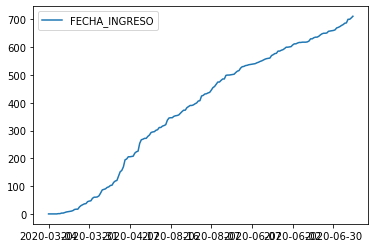

In [74]:
DEFF2.plot()
# Add a legend
plt.legend()

# Show the plot
plt.show()